### MNIST

In [14]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# 각 픽셀의 255값이 최댓값이므로 0~1 사이의 값으로 조정(일종의 min-max scaler)

In [15]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### one-hot-encoding을 해줘야되지만 loss함수를 sparse_categorical_crossentropy로 설정하면 같은 효과

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


![](2024-01-29-19-31-28.png)

### softmax
- 분류될 클래스가 n개라 할 때 각 클래스에 속할 확률을 추정하고 가장 높은 확률의 클래스를 결과값으로 반환한다

![](2024-01-29-19-32-30.png)

### 모델 학습

In [19]:
%%time
import time

start_time = time.time()

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                 epochs=10, batch_size=100, verbose=1)
print('Fit time :', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0802 - val_accuracy: 0.9809
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0688 - val_accuracy: 0.9822
Epoch 3/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.0726 - val_accuracy: 0.9830
Epoch 4/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0717 - val_accuracy: 0.9827
Epoch 5/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0936 - val_accuracy: 0.9792
Epoch 6/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0087 - accuracy: 0.9972 - val_loss: 0.1080 - val_accuracy: 0.9776
Epoch 7/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.0714 - val_accuracy: 0.9838
Epoch 

### acc와 loss

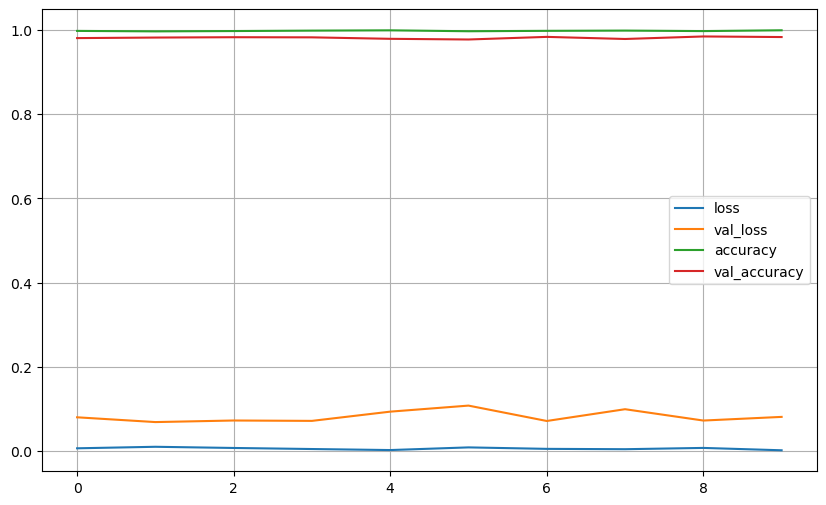

In [23]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(10, 6))

for each in plot_target:
    plt.plot(hist.history[each], label = each)

plt.legend()
plt.grid()
plt.show()

In [24]:
score = model.evaluate(x_test, y_test)
score

313/313 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.9834


[0.08115851134061813, 0.9833999872207642]

In [25]:
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.08115851134061813
Test accuracy : 0.9833999872207642


### 틀린 데이터 확인

In [30]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_result

313/313 [==============================] - 1s 2ms/step


array([[9.6601031e-17, 3.1973747e-16, 1.9237794e-14, ..., 1.0000000e+00,
        2.1075243e-15, 4.4773039e-12],
       [2.1353268e-18, 9.4493781e-11, 1.0000000e+00, ..., 4.0796364e-26,
        3.7968315e-16, 1.8428830e-24],
       [2.4325187e-14, 9.9999738e-01, 1.2901621e-07, ..., 1.0986617e-07,
        2.3301066e-06, 3.2205788e-14],
       ...,
       [1.7014559e-27, 7.5619228e-21, 1.9318248e-25, ..., 1.6082167e-12,
        5.3615658e-12, 4.5351067e-11],
       [2.4744335e-19, 4.1584765e-21, 1.8601609e-22, ..., 9.3642861e-17,
        1.1454943e-10, 4.6151256e-22],
       [8.1172598e-18, 1.1703995e-22, 6.5268881e-16, ..., 2.4999912e-21,
        4.9986885e-17, 6.1017114e-18]], dtype=float32)

In [31]:
predicted_result[0]
# 최대 값은 1.0000000e+00 으로 순서대로하면 숫자 '7' 이다

array([9.6601031e-17, 3.1973747e-16, 1.9237794e-14, 4.3284651e-09,
       4.4422717e-21, 6.5923757e-15, 1.2179123e-18, 1.0000000e+00,
       2.1075243e-15, 4.4773039e-12], dtype=float32)

In [32]:
np.argmax(predicted_result[0])
# argmax : maxium 값의 인덱스를 읽어 오는 메써드

7

In [33]:
predicted_labels = np.argmax(predicted_result, axis = 1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [34]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [27]:
worng_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        worng_result.append(n)

len(worng_result)

166

### 16개만 시각화 확인

In [28]:
import random

samples = random.choices(population=worng_result, k=16)
samples

[4740,
 3503,
 9729,
 2648,
 1393,
 3727,
 6046,
 3073,
 9009,
 4289,
 2093,
 582,
 7800,
 8508,
 9015,
 2720]

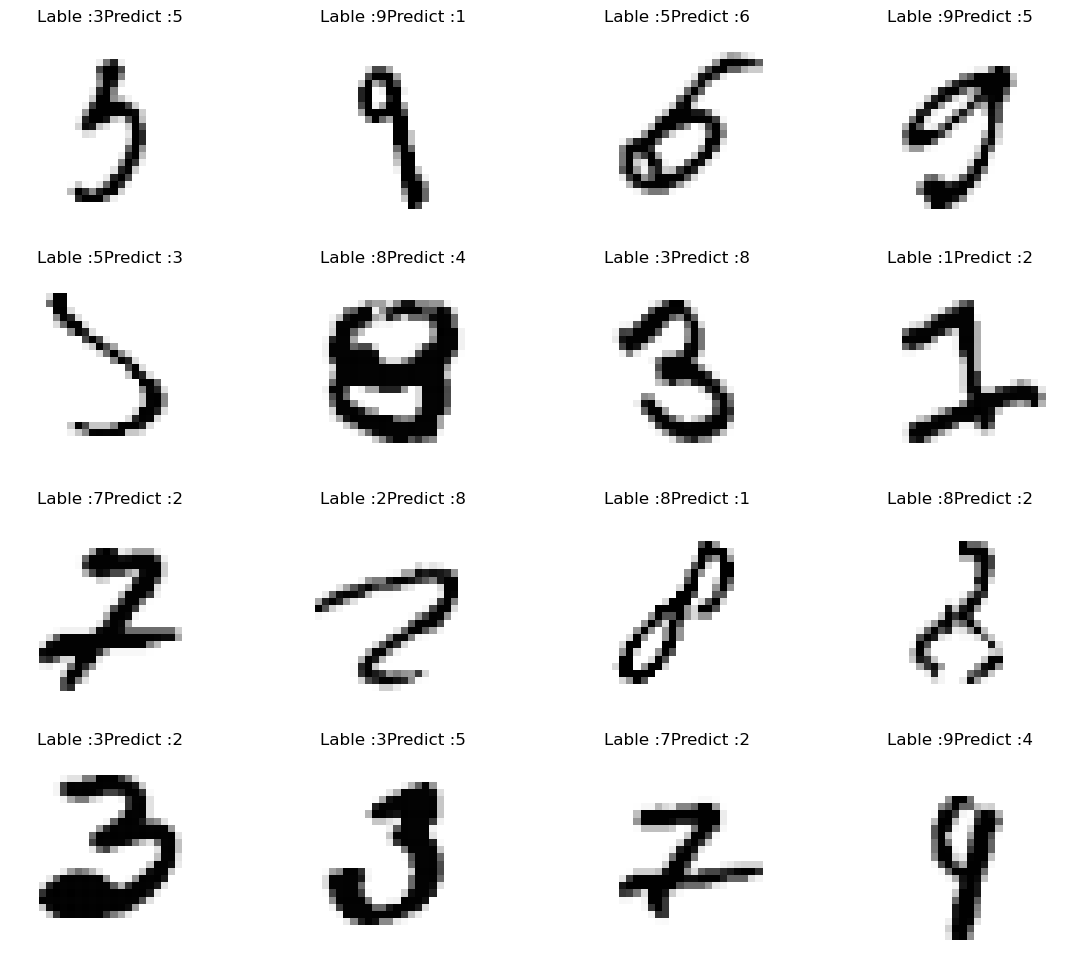

In [29]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Lable :' + str(y_test[n]) + ', ' + 'Predict :' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

### MNIST fashion data

In [37]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
# 각 픽셀의 255값이 최댓값이므로 0~1 사이의 값으로 조정(일종의 min-max scaler)

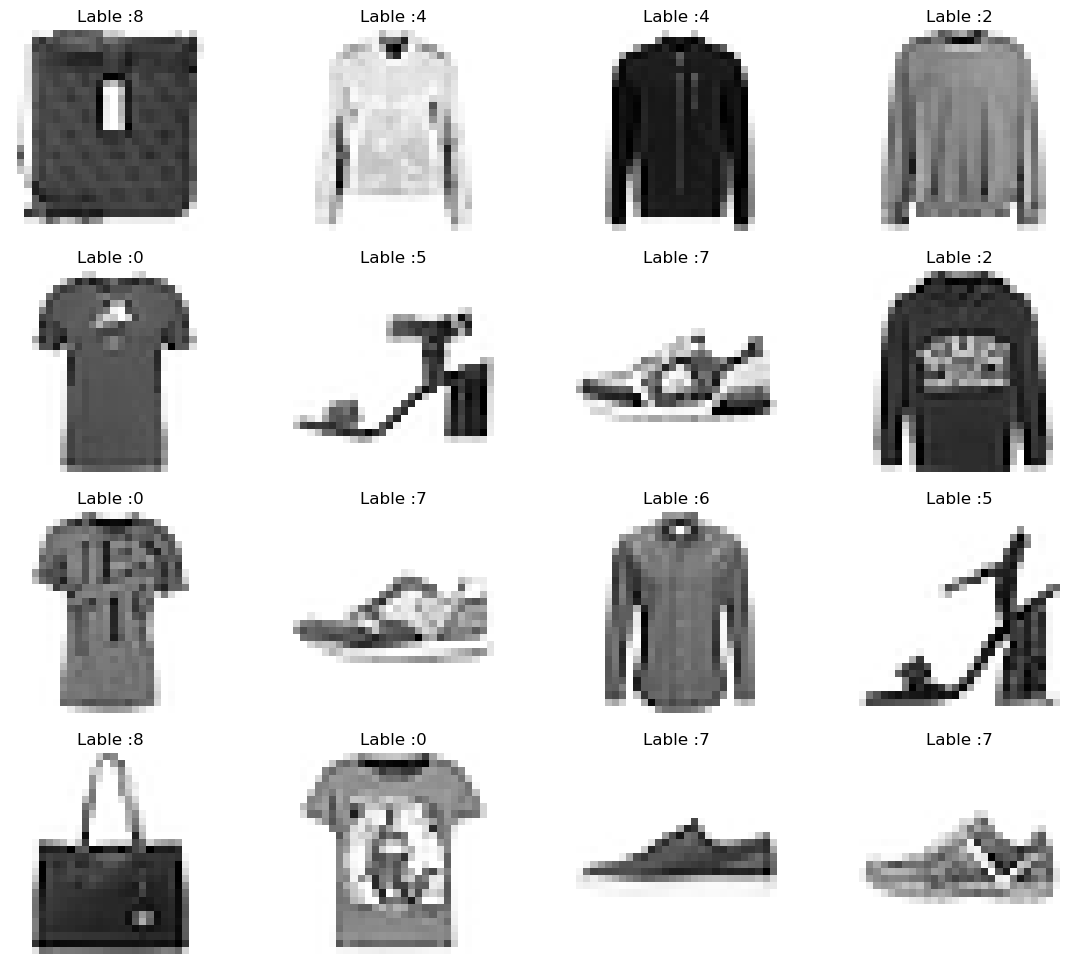

In [38]:
samples = random.choices(population=range(0, len(y_train)), k = 16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Lable :' + str(y_train[n]))
    plt.axis('off')

plt.show()

### 모델(숫자때와 동일)

In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 1000)              785000    
                                                                 
 dense_5 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 학습

In [41]:
%%time
import time

start_time = time.time()

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs=10, batch_size=100, verbose=1)
print('Fit time :', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 5s 7ms/step - loss: 0.4839 - accuracy: 0.8299 - val_loss: 0.4483 - val_accuracy: 0.8412
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.3578 - accuracy: 0.8704 - val_loss: 0.3739 - val_accuracy: 0.8672
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.3190 - accuracy: 0.8832 - val_loss: 0.3829 - val_accuracy: 0.8607
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.2971 - accuracy: 0.8911 - val_loss: 0.3410 - val_accuracy: 0.8744
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.2791 - accuracy: 0.8967 - val_loss: 0.3255 - val_accuracy: 0.8838
Epoch 6/10
600/600 [==============================] - 5s 9ms/step - loss: 0.2644 - accuracy: 0.9021 - val_loss: 0.3452 - val_accuracy: 0.8779
Epoch 7/10
600/600 [==============================] - 5s 9ms/step - loss: 0.2493 - accuracy: 0.9056 - val_loss: 0.3224 - val_accuracy: 0.8837
Epoch 

### acc와 loss 확인
- val_loss와 train_loss 사이의 간격 발생

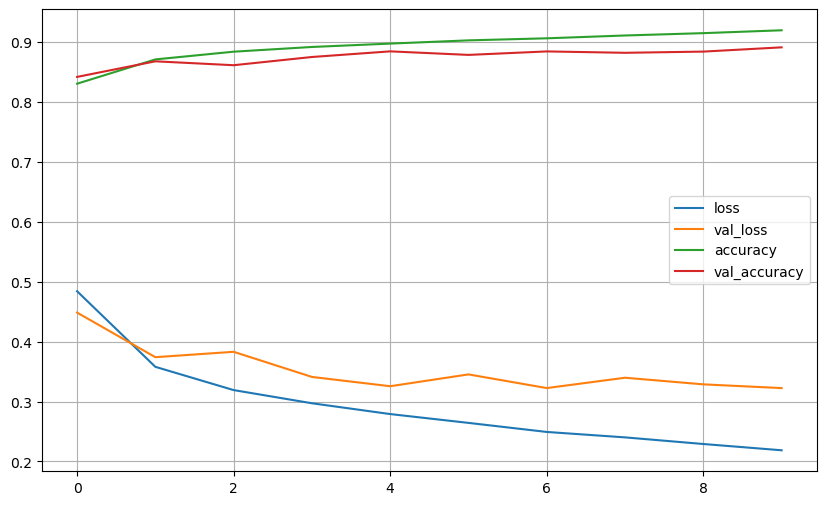

In [42]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(10, 6))

for each in plot_target:
    plt.plot(hist.history[each], label = each)

plt.legend()
plt.grid()
plt.show()

In [43]:
score = model.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3224 - accuracy: 0.8905
Test loss : 0.32238349318504333
Test accuracy : 0.890500009059906


### 틀린데이터 확인 및 시각화

In [44]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis = 1)
predicted_labels[:10]


313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [45]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [46]:
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        worng_result.append(n)

len(worng_result)


1261

In [50]:
samples = random.choices(population=worng_result, k=16)
samples

[8001,
 8774,
 4882,
 1254,
 3080,
 6012,
 6649,
 283,
 722,
 7535,
 8799,
 6243,
 7182,
 9073,
 2509,
 9668]

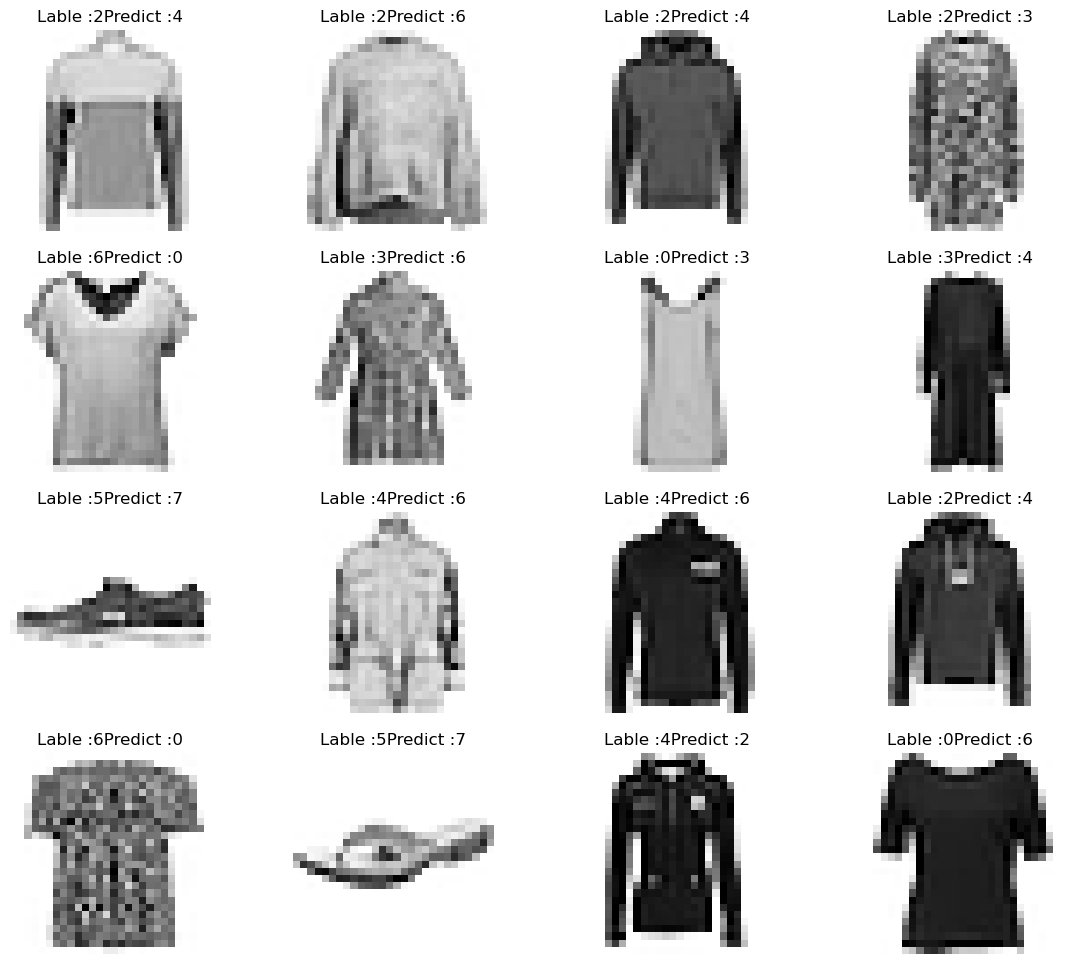

In [51]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.title('Lable :' + str(y_test[n]) + ', ' + 'Predict :' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()